In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Populando Dataset

In [7]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Explorando Valores K

In [8]:
k_range = range(1,21)
accuracies = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

## Plotando

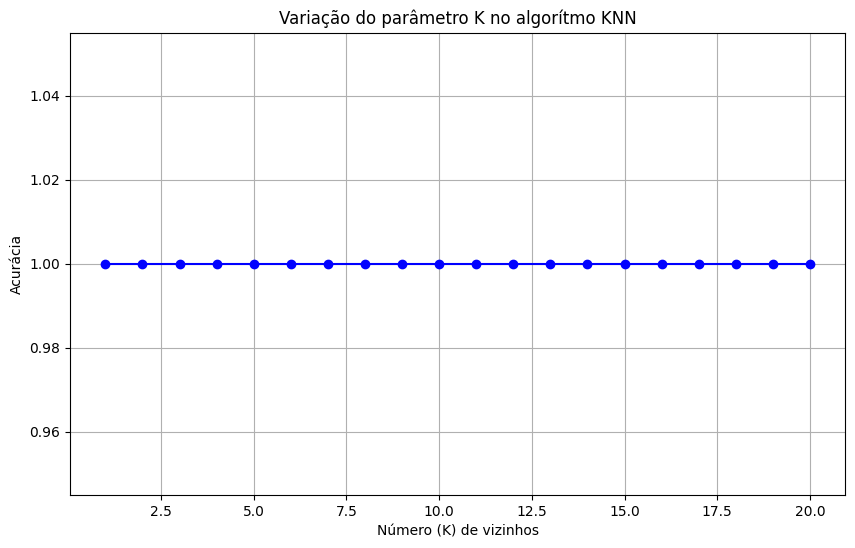

In [9]:
plt.figure(figsize=(10,6))
plt.plot(k_range, accuracies, marker='o', color='blue')
plt.xlabel("Número (K) de vizinhos")
plt.ylabel("Acurácia")
plt.title("Variação do parâmetro K no algorítmo KNN")
plt.grid()
plt.show()

## Usando Grid Search para otimizar o parâmetro K

In [10]:
param_grid = {'n_neighbors':k_range}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor valor de k: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

Melhor valor de k: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

